# Project: Data Wrangling and Analysis of the WeRateDogs Twitter Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#data gathering">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Store Data</a></li>
<li><a href="#analyze">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset provided for wrangling is the tweet archive of twitter user WeRateDogs. Additional data is also to be sourced programmatically to supplement this data. WeRateDogs is a very famous twitter account with over 4 million followers, that has gained wide media coverage over the years for their humorous contents about dogs. Created in 2015, it started rating dogs and have continued to do so till date. Using a metric score of 10, most dogs have been rated with numerator values higher than 10 by WeRateDogs for the simple reason that they are good dogs, [Brent](https://knowyourmeme.com/memes/theyre-good-dogs-brent)!(click to find out about this inside joke!)

The twitter archive contains basic tweet data such as tweet_id, timestamp, dog_stage, twitter url etc. Additional data is to be obtained by querying Twitter's API as well as downloading programatically, a dataset about the top 3 predictions of dog breeds by an algorithm using images contained in the twitter archive. 

The following sections in this notebook will address the key components of data wrangling; gathering, assessing and cleaning data in preparation for analysis and visualization.

In [1]:
# Loading all required libriaries
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
from io import StringIO
import re
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mycolorpy import colorlist as mcp

In [2]:
# to view long strings in any pandas dataframe created
pd.set_option('display.max_colwidth', None) 

<a id='data gathering'></a>
## Data Gathering

For this project, three datasets were used: The WeRateDogs twitter archive stored in a csv format, additional data obtained via querying Twitter's API with Tweepy's library and an Image Predictions File used to classify breeds of dogs. This last file was downloaded programmatically using the Python Requests library.

The following sets of code will help gather these datasets in preparation for assessment and cleaning.

### Dataset 1 - WeRateDogs Twitter Archive

In [3]:
# reading the WeRateDogs Twitter archive file into a pandas dataframe
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Dataset 2 - Additional Twitter Data

N.B. Unfortunately, I was unable to set up a twitter developer account owing to some twitter verification issues I experienced that still hasn't been resolved yet. The 'tweet_json.txt' file provided for this project for such cases as mine, was used instead. The code required to obtain this txt file has been included in the cell below, each line has been commented out to avoid getting an error from running the code without the required consumer key and token from Twitter API

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    # for tweet_id in tweet_ids:
        # count += 1
        # print(str(count) + ": " + str(tweet_id))
        # try:
            # tweet = api.get_status(tweet_id, tweet_mode='extended')
            # print("Success")
            # json.dump(tweet._json, outfile)
            # outfile.write('\n')
        # except tweepy.TweepError as e:
            # print("Fail")
            # fails_dict[tweet_id] = e
            # pass
# end = timer()
# print(end - start)
# print(fails_dict)


The code below reads this text file line by line into a pandas dataframe extracting the tweet_id, retweet count and favorite count from each line. 


In [5]:
df_list = []
with open('tweet-json.txt') as file:
#To access the multiple dictionaries in each line of the text file using json.load, the dictionaries are wrapped in a list with the code below:
    data = [json.loads(line) for line in file]
    # extracting desired values using the dictionary keys and appending to the empty list; df_list
    for dict in data:
        tweet_id = dict['id']
        fav_count = dict['favorite_count']
        retweet_count = dict['retweet_count']
        df_list.append({'tweet_id': tweet_id,
                        'favourite_count': fav_count,
                        'retweet_count': retweet_count})
# the additional twitter data is then read into a pandas dataframe below        
twitter_df2 = pd.DataFrame(df_list, columns = ['tweet_id', 'favourite_count', 'retweet_count'])
twitter_df2.head()
    


,tweet_id,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Dataset 3 - Dog Image Predictions

In [6]:
# Using the requests library with the provided url, the image_predictions.tsv file is downloaded programmatically
r = requests.get(url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r.status_code
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [7]:
# the text obtained is in a tsv format, it is read into a pandas dataframe below using the stringIO function to enable the text to be read as a file_like object
text = r.text
image_predictions = pd.read_csv(StringIO(text), sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='assess'></a>
## Assessing Data

After gathering, the 3 datasets are inspected for data quality issues as well as structural issues. This is done both visually and programmatically.




### Assessing Dataset 1 - twitter_df1

In [8]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


Visually inspecting the first dataset, twitter_df, the following quality and tidiness issues are identified:

Quality:
* missing values in several columns e.g retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp etc.
* There are missing values in the name, doggo, floofer, pupper and puppo columns that are represented as 'None'
* There are inaccurate values in the name column such as 'a' and 'an'.
* Some records have inaccurate ratings of demominator values higher than 10 and high numerator values as well in hundreds.

Tidiness:
* The doggo, floofer, pupper and puppo column names are actually values of the same variable - dog stage.
* The text column has multiple information including the actual text(tweet), its rating and its twitter_url.

The twitter_df table is further assessed programatically to gain more insights

In [9]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The code above indicates that there are only 181 retweeted data, there are missing values for the expanded_urls column and the name, doggo, floofer, pupper and puppo columns have all their values falsely represented as non-null values.

The data type for the timestamp column is represented as an object and the id columns are represented as int or float type.For instance, the tweet_id is represented as an int data type.

In [10]:
sum(twitter_df.duplicated())

0

In [11]:
twitter_df[twitter_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The table above indicates a maximum rating_denominator value of 170 which is a far cry from its mean value of 10. This is most likely an incorrect value. Likewise, the numerator has a maximum value of 1776. These columns are further investigated below to view possible incorrect values existing in both columns.

In [13]:
twitter_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [14]:
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
# to check if there are null values in the following columns
print(np.count_nonzero(twitter_df[['doggo','pupper','puppo','floofer','name']].isnull()))

0


In [16]:
# show the no of unique values contained in the following columns
twitter_df[['doggo','pupper','puppo','floofer']].nunique()

doggo      2
pupper     2
puppo      2
floofer    2
dtype: int64

In [17]:
# show the distinct names (values) in the following columns
print(np.unique(twitter_df[['doggo','pupper','puppo','floofer']].values))

['None' 'doggo' 'floofer' 'pupper' 'puppo']


In [18]:
print(twitter_df.doggo.unique())

['None' 'doggo']


Although, there appears to be no null values in the doggo, pupper, puppo and floofer columns, the codes above show each column has 2 unique values; 'None' and its column name i.e doggo has 2 unique values; 'doggo' and 'None'.



In [19]:
# code to show all unique names in the name columns
print(sorted(twitter_df.name.unique()))

['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al', 'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander', 'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue', 'Bluebert', 'Bo', 'Bob', 'Bobb', 'Bobbay', 'Bobble', 'Bobby', 'Bode', 'Bodie', 'Bonapart

In [20]:
print(twitter_df[twitter_df.name=='None'].any(axis=1))

5       True
7       True
12      True
24      True
25      True
        ... 
2342    True
2343    True
2344    True
2351    True
2355    True
Length: 745, dtype: bool


It appears as though the incorrect names start with lower case letters as can be seen in the sorted list above.
Also the name column has 745 None values.

The assessment observations for table 1 are updated to include:

Quality:
* Erroneous data types for the tweet_id, retweeted_status_timestamp and timestamp columns.


### Assessing Dataset 2 - twitter_df2

In [21]:
twitter_df2

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [22]:
twitter_df2.sample(10)

,tweet_id,favourite_count,retweet_count
446,819015331746349057,0,21794
2204,668631377374486528,763,349
619,796125600683540480,5511,2079
329,833124694597443584,22133,5513
2348,666050758794694657,136,60
781,775364825476165632,8295,3472
2307,666804364988780544,250,95
1850,675707330206547968,2154,771
660,791026214425268224,0,4858
427,821149554670182400,9718,2320


In [23]:
twitter_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   favourite_count  2354 non-null   int64
 2   retweet_count    2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [24]:
twitter_df2.describe()

,tweet_id,favourite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [25]:
sum(twitter_df2.duplicated())

0

In [26]:
twitter_df2[twitter_df2.tweet_id.duplicated()]

,tweet_id,favourite_count,retweet_count


Visual assessment of this dataframe does not indicate any quality issues. However, structurally, the table contains attributes fitting to the 1st table: twitter_df. In other words, the same type of observational unit should form a table.
After both visual and programmatic assessment, the following issues were identified:


Quality:
* Erroneous data type for `tweet_id`.

Tidiness:
* The 'favourite_count' and 'retweet_count' of the `twitter_df2` table should be included in `twitter_df`.

### Assessing Dataset 3 - image_predictions

In [27]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [28]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
331,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,0.000087,True,racket,0.000053,False
639,681297372102656000,https://pbs.twimg.com/media/CXR0WJ_W8AMd_O8.jpg,1,Lhasa,0.482401,True,Shih-Tzu,0.113672,True,Pomeranian,0.096229,True
1038,712065007010385924,https://pbs.twimg.com/media/CeHDV73W0AM5Cf8.jpg,1,goose,0.214301,False,gibbon,0.084253,False,pizza,0.080168,False
1361,761227390836215808,https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg,1,cougar,0.306512,False,French_bulldog,0.280802,True,boxer,0.054523,True
546,677328882937298944,https://pbs.twimg.com/media/CWZbBlAUsAAjRg5.jpg,1,water_buffalo,0.424250,False,kelpie,0.029054,True,Staffordshire_bullterrier,0.028470,True
71,667200525029539841,https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg,1,Siberian_husky,0.694904,True,malamute,0.232006,True,Eskimo_dog,0.050635,True
287,671154572044468225,https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg,1,Labrador_retriever,0.495047,True,Chesapeake_Bay_retriever,0.350188,True,golden_retriever,0.142400,True
785,690248561355657216,https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg,1,motor_scooter,0.382690,False,moped,0.318017,False,pickup,0.040625,False
128,668274247790391296,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,1,soft-coated_wheaten_terrier,0.406374,True,Lakeland_terrier,0.263854,True,toy_poodle,0.150844,True
1956,864873206498414592,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False


In [29]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
sum(image_predictions.duplicated())

0

In [32]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
# to find duplicate column names in all three tables (only tweet_id is expected to be a duplicate column)
all_columns = pd.Series(list(twitter_df) + list(twitter_df2) + list(image_predictions))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

After both visual and programmatic assessment, the following issues were identified:


Quality:
* Erroneous data type for `tweet_id`.
* Inconsistent use of lowercase or uppercase letters in the *p1*, *p2* and *p3* columns. 

Tidiness:
* The table contains attributes that should be included in the 1st table: `twitter_df`.

### Assessment Summary

#### Quality Issues
##### `twitter_df` table
1. Missing values in the *name*, *doggo*, *floofer*, *pupper* and *puppo* columns - **Completeness issue**.
2. Inaccurate representation of missing values in the *name*, *doggo*, *floofer*, *pupper* and *puppo* columns represented as 'None' - **Accuracy issue**.
3. Missing values in several columns (*retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp*, *expanded_urls*, *in_reply_to_status_id*, *in_reply_to_user_id*) - **Completeness Issue**.
4. Inaccurate values in the *name* column - **Accuracy Issue**.
5. Inaccurate values in the *rating_denominator* column - **Accuracy Issue**.
6. Inaccurate values in the *rating_numerator* column - **Accuracy Issue**.
7. Erroneous data types for the *tweet_id*, *retweeted_status_timestamp* and *timestamp* columns - **Validity Issue**.
7. Not all tweets are dog ratings/have images - **Consistency Issue**.
8. Some tweets are actually retweets i.e not original ratings.


##### `twitter_df2` table
10. Erroneous data type for *tweet_id* - **Validity Issue**.

##### `image_predictions` table
11. Erroneous data type for *tweet_id* - **Validity Issue**.
12. Incosistent use of lowercase or uppercase letters in the *p1*, *p2* and *p3* columns - **Inconsistency Issue**. 

#### Tidiness Issues

1. The text column in `twitter_df` table has multible variables: text and twitter url 
2.The *doggo*, *floofer*, *pupper* and *puppo* column names should be collapsed into one column with a variable named dog stage.
3. The *favourite_count* and *retweet_count* of the `twitter_df2` table should be included in `twitter_df`table.
4. All the columns in `image_predictions` should be included in `twitter_df` table.


<a id='clean'></a>
## Cleaning Data

To begin, a copy of each piece of data is created below:

In [34]:
twitter_df_clean = twitter_df.copy()
twitter_df2_clean = twitter_df2.copy()
image_predictions_clean = image_predictions.copy()

### Missing Data

#### `twitter_df`: Missing values in several columns (*retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp*, *expanded_urls*, *in_reply_to_status_id*, *in_reply_to_user_id*)

#### Define
Only original ratings required i.e no retweets.

* Delete instances that are retweeted or are response tweets from `twitter_df_clean` 
* Drop the *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp*, *in_reply_to_status_id* and *in_reply_to_user_id* columns
* Leave missing values in the *expanded_urls* column unchanged


#### Code

In [35]:
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_id.isnull() & twitter_df_clean.in_reply_to_status_id.isnull()]

#### Test

In [36]:
sum(twitter_df_clean.retweeted_status_id.notnull())

0

In [37]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [38]:
# 5 columns that contain info about retweets and responses are then dropped below
twitter_df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'in_reply_to_user_id','in_reply_to_status_id'], axis = 1, inplace = True)

In [39]:
# dimension after cleaning
twitter_df_clean.shape

(2097, 12)

#### `twitter_df`: Missing values in the name, doggo, floofer, pupper and puppo columns that are represented as 'None'

#### Define

* Replace missing values represented as 'None' with NaN in the *doggo*, *pupper*, *puppo* and *name* columns.




#### Code

In [40]:
columns = ['name','doggo','floofer', 'pupper', 'puppo']
twitter_df_clean[columns] = twitter_df_clean[columns].replace('None', np.nan)

#### Test

In [41]:
twitter_df_clean[(twitter_df_clean.name == 'None') | (twitter_df_clean.doggo == 'None') | (twitter_df_clean.floofer == 'None') | (twitter_df_clean.pupper == 'None') | (twitter_df_clean.puppo == 'None')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [42]:
twitter_df_clean[columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     1494 non-null   object
 1   doggo    83 non-null     object
 2   floofer  10 non-null     object
 3   pupper   230 non-null    object
 4   puppo    24 non-null     object
dtypes: object(5)
memory usage: 98.3+ KB


Given that the null values are quite many for each of these columns above, the missing values  will not be imputed with the mode value in each column as this could skew possible analyses to be carried out in favour of that mode value.

In [43]:
twitter_df_clean[twitter_df_clean.pupper.isnull()].sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1554,688898160958271489,2016-01-18 01:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you have a ton of work to do but then remember you have tomorrow off. 10/10 https://t.co/MfEaMUFYTx,"https://twitter.com/dog_rates/status/688898160958271489/photo/1,https://twitter.com/dog_rates/status/688898160958271489/photo/1",10,10,NaN,NaN,NaN,NaN,NaN
2052,671486386088865792,2015-12-01 00:30:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Malcolm. He just saw a spider. 10/10 https://t.co/ympkwF65Dx,https://twitter.com/dog_rates/status/671486386088865792/photo/1,10,10,Malcolm,NaN,NaN,NaN,NaN
145,863553081350529029,2017-05-14 00:34:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Neptune. He's a backpup vocalist for the Dixie Chicks. 13/10 (vid by @AmiWinehouse) https://t.co/tordvmaaop,https://twitter.com/dog_rates/status/863553081350529029/video/1,13,10,Neptune,NaN,NaN,NaN,NaN
731,781655249211752448,2016-09-30 00:41:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Combo. The daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/LOKrNo0OM7,https://vine.co/v/5rt6T3qm7hL,11,10,Combo,doggo,NaN,NaN,NaN
1402,699423671849451520,2016-02-16 02:42:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Don't ever talk to me or my son again."" ...both 10/10 https://t.co/b8ncwl6TlE",https://twitter.com/dog_rates/status/699423671849451520/photo/1,10,10,NaN,NaN,NaN,NaN,NaN
1460,695051054296211456,2016-02-04 01:07:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Brian (pronounced ""Kirk""). He's not amused by ur churlish tomfoolery. Once u put him down you're done for. 6/10 https://t.co/vityMwPKKi","https://twitter.com/dog_rates/status/695051054296211456/photo/1,https://twitter.com/dog_rates/status/695051054296211456/photo/1",6,10,Brian,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN
375,828361771580813312,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,12,10,NaN,NaN,NaN,NaN,NaN
834,768473857036525572,2016-08-24 15:43:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Chevy. He had a late breakfast and now has to choose between a late lunch or an early dinner. 11/10 very pupset https://t.co/goy9053wC7,https://twitter.com/dog_rates/status/768473857036525572/photo/1,11,10,Chevy,NaN,NaN,NaN,NaN
1708,680798457301471234,2015-12-26 17:12:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Moofasa. He must be a powerful dog. Fenced in for your protection. Just got his ear pierced. 6/10 https://t.co/w6fRfQ3RXD,https://twitter.com/dog_rates/status/680798457301471234/photo/1,6,10,Moofasa,NaN,NaN,NaN,NaN


### Tidiness

#### `twitter_df`:  *text* column has multible variables: text and twitter url 

#### Define

* Split text column into 2 columns with variable names; *text* and *twitter_url*.




#### Code

In [44]:
twitter_df_clean['twitter_url'] = twitter_df_clean.text.str.extract('([h][t]{2}[p][s].+)', expand=True)
twitter_df_clean['text'] = twitter_df_clean.text.apply(lambda line:line.split('https://')[0])

#### Test

In [45]:
twitter_df_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,twitter_url
819,770655142660169732,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10,https://twitter.com/dog_rates/status/770655142660169732/photo/1,11,10,very,NaN,NaN,NaN,NaN,https://t.co/qlUDuPoE3d
1836,676098748976615425,2015-12-13 17:57:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Extremely rare pup here. Very religious. Always praying. Too many legs. Not overwhelmingly fluffy. Won't bark. 3/10,https://twitter.com/dog_rates/status/676098748976615425/photo/1,3,10,NaN,NaN,NaN,NaN,NaN,https://t.co/REyE5YKVBb
1704,680889648562991104,2015-12-26 23:15:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cheesy. It's her birthday. She's patiently waiting to eat her party muffin. 9/10 happy birthday pup,https://twitter.com/dog_rates/status/680889648562991104/photo/1,9,10,Cheesy,NaN,NaN,NaN,NaN,https://t.co/cH2H7mch2H
1800,676975532580409345,2015-12-16 04:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He doesn't know how cheese works. Likes the way it feels on his face. Cheeky tongue slip. 11/10,https://twitter.com/dog_rates/status/676975532580409345/photo/1,11,10,Cooper,NaN,NaN,NaN,NaN,https://t.co/j1zczS0lI5
1530,690021994562220032,2016-01-21 04:03:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Geoff (pronounced ""Kyle""). He accidentally opened the front facing camera. 10/10",https://twitter.com/dog_rates/status/690021994562220032/photo/1,10,10,Geoff,NaN,NaN,NaN,NaN,https://t.co/TmlwQWnmRC
1642,684097758874210310,2016-01-04 19:43:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lupe. This is how she sleeps. 10/10 impressive really,https://twitter.com/dog_rates/status/684097758874210310/photo/1,10,10,Lupe,NaN,NaN,NaN,NaN,https://t.co/Fz6iZWlk8C
2130,670093938074779648,2015-11-27 04:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wally. He's a Flaccid Mitochondria. Going on vacation. Bag definitely full of treats. Great hat. 9/10,https://twitter.com/dog_rates/status/670093938074779648/photo/1,9,10,Wally,NaN,NaN,NaN,NaN,https://t.co/vYs9IVzHY9
1608,685641971164143616,2016-01-09 01:59:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Otis. He just passed a cop while going 61 in a 45. Very nervous pupper. 7/10,https://twitter.com/dog_rates/status/685641971164143616/photo/1,7,10,Otis,NaN,NaN,pupper,NaN,https://t.co/jJS8qQeuNO
459,817827839487737858,2017-01-07 20:18:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Buddy. He ran into a glass door once. Now he's h*ckin skeptical. 13/10 empowering af (vid by Brittany Gaunt),https://twitter.com/dog_rates/status/817827839487737858/video/1,13,10,Buddy,NaN,NaN,NaN,NaN,https://t.co/q2BgNIi3OA
2173,669324657376567296,2015-11-25 01:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Ralf. He's a miniature Buick DiCaprio. Can float (whoa). Loves to beach. Snazzy green vest. 11/10 I'd hug Ralf,https://twitter.com/dog_rates/status/669324657376567296/photo/1,11,10,Ralf,NaN,NaN,NaN,NaN,https://t.co/R5Z6jBTdhc


In [46]:
twitter_df_clean.text.sample(10)

1436                  Meet Charlie. He likes to kiss all the big milk dogs with the rad earrings. Passionate af. 10/10 just a great guy 
1439                          These two pirates crashed their ship and don't know what to do now. Very irresponsible of them. Both 9/10 
526                This is Ito. He'll be your uber driver tonight. Currently adjusting the mirrors. 13/10 incredibly h*ckin responsible 
1299                                             He's doing his best. 12/10 very impressive that he got his license in the first place  
1836                Extremely rare pup here. Very religious. Always praying. Too many legs. Not overwhelmingly fluffy. Won't bark. 3/10 
846                         This is Oscar. He has legendary eyebrows and he h*ckin knows it. Curly af too. 12/10 would hug passionately 
1901              Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 
472                             Meet Moos

In [47]:
twitter_df_clean.twitter_url.sample(10)

16                              https://t.co/chxruIOUJN
2089                            https://t.co/RGcNPsmAfY
52                              https://t.co/zeDpnsKX7w
1287                            https://t.co/oSuEGw0BhX
1657                            https://t.co/hhIA3coiAJ
1338                            https://t.co/VA6jnNUyuW
1869                            https://t.co/RDXCfk8hK0
1764                            https://t.co/rtMtjSl9pz
436     https://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE
584                             https://t.co/pbKOesr8Tg
Name: twitter_url, dtype: object

In [48]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1494 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              230 non-null    object
 11  puppo               24 non-null     object
 12  twitter_url         2094 non-null   object
dtypes: int64(3), object(10)
memory usage: 229.4+ KB


In [49]:
# dimension after cleaning
twitter_df_clean.shape

(2097, 13)

#### `twitter_df`:  Four values of one attribute -  dog stage misrepresented as  four distinct variables; doggo, floofer, pupper and puppo 

#### Define

* Melt the *doggo*, *floofer*, *pupper* and *puppo* columns into a varable named *dog_stage* and its values should be stored in a column called *value*.




#### Code

In [50]:
twitter_df_clean = pd.melt(twitter_df_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'twitter_url'],
                           var_name='dog_stage', value_name='value')

In [51]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,twitter_url,dog_stage,value
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://t.co/MgUWQ76dJU,doggo,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://t.co/0Xxu71qeIV,doggo,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://t.co/wUnZnhtVJB,doggo,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://t.co/tD36da7qLQ,doggo,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://t.co/AtUZn91f7f,doggo,NaN


The result appears to be what is desired, however, it is suspected that duplicate rows have now been created as a result of thr melting function. The code below confirms this:

In [52]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            8388 non-null   int64 
 1   timestamp           8388 non-null   object
 2   source              8388 non-null   object
 3   text                8388 non-null   object
 4   expanded_urls       8376 non-null   object
 5   rating_numerator    8388 non-null   int64 
 6   rating_denominator  8388 non-null   int64 
 7   name                5976 non-null   object
 8   twitter_url         8376 non-null   object
 9   dog_stage           8388 non-null   object
 10  value               347 non-null    object
dtypes: int64(3), object(8)
memory usage: 721.0+ KB


In [53]:
# to check for duplicates - this code gives a false indication that there aren't any duplicates
sum(twitter_df_clean.duplicated())

0

In [54]:
# better code to reveal duplicates using the variable tweet_id - this shows 6291 records have been duplicated.
twitter_df_clean[twitter_df_clean.tweet_id.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,twitter_url,dog_stage,value
2097,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://t.co/MgUWQ76dJU,floofer,NaN
2098,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://t.co/0Xxu71qeIV,floofer,NaN
2099,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://t.co/wUnZnhtVJB,floofer,NaN
2100,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://t.co/tD36da7qLQ,floofer,NaN
2101,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://t.co/AtUZn91f7f,floofer,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8383,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,https://t.co/4B7cOc1EDq,puppo,NaN
8384,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,https://t.co/DWnyCjf2mx,puppo,NaN
8385,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,https://t.co/y671yMhoiR,puppo,NaN
8386,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,https://t.co/r7mOb2m0UI,puppo,NaN


To confirm all tweet_ids have been duplicated 4 times (the number of columns melted). A row is randomly selected and its tweet_id is used to query the entire dataframe:

In [55]:
twitter_sample = twitter_df_clean.sample()
twitter_sample

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,twitter_url,dog_stage,value
7878,676430933382295552,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Duke. He's an Urban Parmesan. They know he's scared of the green rubber dog. ""Why u do dis?"" thinks Duke. 10/10",https://twitter.com/dog_rates/status/676430933382295552/photo/1,10,10,Duke,https://t.co/3bim9U5Idr,puppo,NaN


In [56]:
# querying the dataframe with the tweet_id of the random sample created above 
twitter_df_clean.query(f'tweet_id == {twitter_sample.tweet_id.values}')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,twitter_url,dog_stage,value
1587,676430933382295552,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Duke. He's an Urban Parmesan. They know he's scared of the green rubber dog. ""Why u do dis?"" thinks Duke. 10/10",https://twitter.com/dog_rates/status/676430933382295552/photo/1,10,10,Duke,https://t.co/3bim9U5Idr,doggo,NaN
3684,676430933382295552,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Duke. He's an Urban Parmesan. They know he's scared of the green rubber dog. ""Why u do dis?"" thinks Duke. 10/10",https://twitter.com/dog_rates/status/676430933382295552/photo/1,10,10,Duke,https://t.co/3bim9U5Idr,floofer,NaN
5781,676430933382295552,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Duke. He's an Urban Parmesan. They know he's scared of the green rubber dog. ""Why u do dis?"" thinks Duke. 10/10",https://twitter.com/dog_rates/status/676430933382295552/photo/1,10,10,Duke,https://t.co/3bim9U5Idr,pupper,NaN
7878,676430933382295552,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Duke. He's an Urban Parmesan. They know he's scared of the green rubber dog. ""Why u do dis?"" thinks Duke. 10/10",https://twitter.com/dog_rates/status/676430933382295552/photo/1,10,10,Duke,https://t.co/3bim9U5Idr,puppo,NaN


Careful inspection of the result above shows that the data contained are almost exactly the same but for the *dog_stage* and its *value* columns. Also, the *dog_stage* column can be deleted since the answer to whether a dog is in any of the four dog stages or has a missing value is actually contained in the *value* column. This *value* column is then renamed as *dog_stage*.

In [57]:
twitter_df_clean.drop(['dog_stage'], axis = 1, inplace = True)
twitter_df_clean.rename({'value': 'dog_stage'}, axis=1, inplace=True)

In [58]:
sum(twitter_df_clean.duplicated())

5944

In [59]:
# duplicates rows can now be dropped
twitter_df_clean.drop_duplicates(inplace=True, ignore_index=True)

In [60]:
# confirm duplicates have been dropped
sum(twitter_df_clean.duplicated())

0

In [61]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444 entries, 0 to 2443
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2444 non-null   int64 
 1   timestamp           2444 non-null   object
 2   source              2444 non-null   object
 3   text                2444 non-null   object
 4   expanded_urls       2440 non-null   object
 5   rating_numerator    2444 non-null   int64 
 6   rating_denominator  2444 non-null   int64 
 7   name                1697 non-null   object
 8   twitter_url         2440 non-null   object
 9   dog_stage           347 non-null    object
dtypes: int64(3), object(7)
memory usage: 191.1+ KB


In [62]:
twitter_df_clean.shape

(2444, 10)

Recall before melting was applied, there were 2097 distinct tweet_ids. It appears there are still some duplicate ids i.e some records still having tweets with more than 1 dog stage, this could be either a missing value (NaN) and a dog stage or two or more dog stages per tweet. 

Firstly, all tweet duplicated data is acquired and the null values removed from them.

In [63]:
twitter_df_clean[twitter_df_clean.tweet_id.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,twitter_url,dog_stage
2097,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,https://t.co/t1bfwz5S2A,NaN
2098,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,https://t.co/YSI00BzTBZ,NaN
2099,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,https://t.co/rf661IFEYP,floofer
2100,872967104147763200,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,NaN,https://t.co/EMYIdoblMR,NaN
2101,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,https://t.co/PR7B7w1rUw,NaN
...,...,...,...,...,...,...,...,...,...,...
2439,752519690950500352,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Hopefully this puppo on a swing will help get you through your Monday. 11/10 would push,"https://twitter.com/dog_rates/status/752519690950500352/photo/1,https://twitter.com/dog_rates/status/752519690950500352/photo/1,https://twitter.com/dog_rates/status/752519690950500352/photo/1",11,10,NaN,https://t.co/G54yClasz2,puppo
2440,751132876104687617,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He's just so damn happy. 10/10 what's your secret puppo?,"https://twitter.com/dog_rates/status/751132876104687617/photo/1,https://twitter.com/dog_rates/status/751132876104687617/photo/1",10,10,Cooper,https://t.co/yToDwVXEpA,puppo
2441,744995568523612160,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Abby. She got her face stuck in a glass. Churlish af. 9/10 rookie move puppo,"https://twitter.com/dog_rates/status/744995568523612160/photo/1,https://twitter.com/dog_rates/status/744995568523612160/photo/1",9,10,Abby,https://t.co/2FPb45NXrK,puppo
2442,743253157753532416,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Kilo. He cannot reach the snackum. Nifty tongue, but not nifty enough. 10/10 maybe one day puppo",https://twitter.com/dog_rates/status/743253157753532416/photo/1,10,10,Kilo,https://t.co/gSmp31Zrsx,puppo


In [64]:
# splitting the dataset to obtain rows where tweet_id > 1 and where tweet_id =1
distinct_id = pd.concat(id for _, id in twitter_df_clean.groupby("tweet_id") if len(id) == 1)
all_duplicated_id = pd.concat(id for _, id in twitter_df_clean.groupby("tweet_id") if len(id) > 1)
 


In [65]:
distinct_id.shape

(1761, 10)

In [66]:
all_duplicated_id.shape

(683, 10)

In [67]:
# drop rows with null values 
all_duplicated_id = all_duplicated_id[all_duplicated_id.dog_stage.notnull()]

In [68]:
all_duplicated_id.shape

(347, 10)

In [69]:
# check if there are still duplicates
still_duplicated_id = pd.concat(id for _, id in all_duplicated_id .groupby("tweet_id") if len(id) > 1)
not_duplicated_id  = pd.concat(id for _, id in all_duplicated_id .groupby("tweet_id") if len(id) == 1)

In [70]:
still_duplicated_id.shape

(22, 10)

In [71]:
not_duplicated_id.shape

(325, 10)

The results show that 11 records are still duplicates of some tweet_ids. This is then assessed visually to decide the appropriate dog stage value to keep. Note that visual assessment was done here because of the small size of just 11 records.

In [72]:
still_duplicated_id.loc[:,['tweet_id','text','dog_stage']]

,tweet_id,text,dog_stage
897,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10",doggo
2260,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10",pupper
848,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo,doggo
2253,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo,pupper
748,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho,doggo
2239,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho,pupper
689,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time",doggo
2235,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time",pupper
562,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10",doggo
2224,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10",pupper


After assessing the table above, the following is decided:
   * 5 duplicates are dropped as the containing text indicates clearly the correct dog stage values.
   * 5 duplicates are retained as the text indicates there are 2 dogs in the tweets and have been assigned a dog stage each.
   * The dog stage values for 2 rows are changed to null because the text indicates no dog stage has actually been identified. One row is then dropped.
   
The 5 duplicates will remain as distinct rows i.e one dog stage per row for easy analysis later.
    

In [73]:
still_duplicated_id.drop([2223, 446, 358, 161, 154], inplace = True)
still_duplicated_id.at[748,'dog_stage']=np.nan
still_duplicated_id.at[2239,'dog_stage']=np.nan
still_duplicated_id.drop_duplicates(inplace=True)

In [74]:
still_duplicated_id

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,twitter_url,dog_stage
897,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12,10,NaN,https://t.co/pG2inLaOda,doggo
2260,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12,10,NaN,https://t.co/pG2inLaOda,pupper
848,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,just,https://t.co/o5J479bZUC,doggo
2253,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,just,https://t.co/o5J479bZUC,pupper
748,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,NaN,https://t.co/u2c9c7qSg8,NaN
689,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,https://t.co/MYwR4DQKll,doggo
2235,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,https://t.co/MYwR4DQKll,pupper
562,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10",https://vine.co/v/5rgu2Law2ut,12,10,NaN,https://t.co/WQvcPEpH2u,doggo
2224,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10",https://vine.co/v/5rgu2Law2ut,12,10,NaN,https://t.co/WQvcPEpH2u,pupper
536,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,https://t.co/f2wmLZTPHd,doggo


In [75]:
# join all split records and save in the twitter_df_clean table
twitter_df_clean = pd.concat([distinct_id, not_duplicated_id,still_duplicated_id],
                             ignore_index=True)

#### Test

In [76]:
# check for duplicate tweet_ids; there should only be 5
len(twitter_df_clean[twitter_df_clean.tweet_id.duplicated()])

5

In [77]:
twitter_df_clean.dog_stage.value_counts()

pupper     228
doggo       78
puppo       24
floofer     10
Name: dog_stage, dtype: int64

In [78]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,twitter_url,dog_stage
0,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,NaN,https://t.co/BLDqew2Ijj,NaN
1,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,https://t.co/r7mOb2m0UI,NaN
2,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,https://t.co/y671yMhoiR,NaN
3,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,https://t.co/DWnyCjf2mx,NaN
4,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,https://t.co/4B7cOc1EDq,NaN


In [79]:
twitter_df_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,twitter_url,dog_stage
2097,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,NaN,https://t.co/ANBpEYHaho,doggo
2098,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,NaN,https://t.co/ANBpEYHaho,pupper
2099,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo)",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,https://t.co/m7isZrOBX7,pupper
2100,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,NaN,https://t.co/TXdT3tmuYk,floofer
2101,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,NaN,https://t.co/cMhq16isel,puppo


In [80]:
# dimension after cleaning
twitter_df_clean.shape

(2102, 10)

#### `twitter_df2`:  The *favourite_count* and *retweet_count* of the `twitter_df2` table and all the columns in `image_predictions` should be included in `twitter_df`table. .

#### Define
* Merge the three datasets together to form one `twitter_df_clean` table, joining on *tweet_id*

#### Code

In [81]:
twitter_df_clean = pd.merge(pd.merge(twitter_df_clean, twitter_df2_clean,
                            on='tweet_id', how='left'), image_predictions_clean, on='tweet_id', how='inner')

#### Test

In [82]:
twitter_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,twitter_url,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,NaN,https://t.co/BLDqew2Ijj,NaN,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,https://t.co/r7mOb2m0UI,NaN,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,https://t.co/y671yMhoiR,NaN,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,https://t.co/DWnyCjf2mx,NaN,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,https://t.co/4B7cOc1EDq,NaN,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [83]:
# to confirm addition of the 2 datasets
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 1974
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1975 non-null   int64  
 1   timestamp           1975 non-null   object 
 2   source              1975 non-null   object 
 3   text                1975 non-null   object 
 4   expanded_urls       1975 non-null   object 
 5   rating_numerator    1975 non-null   int64  
 6   rating_denominator  1975 non-null   int64  
 7   name                1449 non-null   object 
 8   twitter_url         1975 non-null   object 
 9   dog_stage           306 non-null    object 
 10  favourite_count     1975 non-null   int64  
 11  retweet_count       1975 non-null   int64  
 12  jpg_url             1975 non-null   object 
 13  img_num             1975 non-null   int64  
 14  p1                  1975 non-null   object 
 15  p1_conf             1975 non-null   float64
 16  p1_dog

### Quality

#### Erroneous data types for the tweet_id column for all tables, and timestamp, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id columns for `twitter_df_clean`.

#### Define

* Convert *tweet_id* in the`twitter_df_clean` table to string data type. The `image_predictions_clean` table has already been merged and its *tweet_id* will not need to be converted. 
* Convert *timestamp* in `twitter_df_clean` to datetime data type. The *retweeted_status_timestamp* column has already been deleted earlier.
* Convert *dog_stage* in `twitter_df_clean` to category data type.

#### Code

In [84]:
# To category
twitter_df_clean.dog_stage = twitter_df_clean.dog_stage.astype('category')

# To datetime
twitter_df_clean.timestamp = pd.to_datetime(twitter_df_clean.timestamp)

# To string
twitter_df_clean.tweet_id = twitter_df_clean.tweet_id.astype(str)

#### Test

In [85]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 1974
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1975 non-null   object             
 1   timestamp           1975 non-null   datetime64[ns, UTC]
 2   source              1975 non-null   object             
 3   text                1975 non-null   object             
 4   expanded_urls       1975 non-null   object             
 5   rating_numerator    1975 non-null   int64              
 6   rating_denominator  1975 non-null   int64              
 7   name                1449 non-null   object             
 8   twitter_url         1975 non-null   object             
 9   dog_stage           306 non-null    category           
 10  favourite_count     1975 non-null   int64              
 11  retweet_count       1975 non-null   int64              
 12  jpg_url             1975 non-null 

#### `twitter_df2_clean`:  Some tweets are not dog ratings 

#### Define
* Select only rows in `twitter_df_clean` for which their *tweet_id* is contained in the *tweet_id* column of the `image_predictions_clean`table. 

#### Code

In [86]:
# This has already been taken care of when an inner join was performed earlier to merge 
# `image_predictions_clean` with the `twitter_df_clean` table.

#### Test

In [87]:
# converting tweet_id in image_predictions_clean to string type to compare with tweet_id in twitter_df_clean in the next code cell
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

In [88]:
twitter_df_clean['tweet_id'].isin(image_predictions_clean['tweet_id']).all()

True

In [89]:
twitter_df_clean.shape

(1975, 23)

#### `twitter_df_clean`:  Incosistent style of naming values in the *p1*, *p2* and *p3* columns 

#### Define
* Change all values to lower case in the *p1*, *p2* and *p3* columns.


#### Code

In [90]:
twitter_df_clean.p1 = image_predictions_clean.p1.str.lower()
twitter_df_clean.p2 = image_predictions_clean.p2.str.lower()
twitter_df_clean.p3 = image_predictions_clean.p3.str.lower()

#### Test

In [91]:
twitter_df_clean.loc[:,['p1','p2','p3']].sample(10)

,p1,p2,p3
688,chow,german_shepherd,golden_retriever
1677,golden_retriever,labrador_retriever,saluki
49,airedale,toy_poodle,teddy
164,basset,welsh_springer_spaniel,saint_bernard
1598,malamute,siberian_husky,eskimo_dog
109,malamute,golden_retriever,muzzle
958,golden_retriever,labrador_retriever,tennis_ball
1960,samoyed,pomeranian,keeshond
841,bow_tie,fur_coat,black-footed_ferret
147,miniature_schnauzer,australian_terrier,silky_terrier


#### `twitter_df_clean`:  Inaccurate values in the name column

#### Define
* Select rows in `twitter_df_clean` fow which their names start with lowercase letters and visually inspect text in each rows to look for patterns to be used for name extraction.
* Extract correct names where possible and replace in name column.
* Replace all other incorrect names with a null value (NaN)

#### Code

In [92]:
# check dimension of all rows affected
twitter_df_clean[(twitter_df_clean.name.str.islower() == True)].loc[:,['text','name']].shape

(99, 2)

In [93]:
# display all rows with the text and name columns only
pd.set_option('display.max_rows', None)
twitter_df_clean[(twitter_df_clean.name.str.islower() == True)].loc[:,['tweet_id','text','name']]

,tweet_id,text,name
1,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,a
2,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,a
3,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,a
5,666050758794694657,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with,a
6,666051853826850816,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10,an
7,666055525042405380,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog,a
8,666057090499244032,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare,a
9,666058600524156928,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog,the
10,666063827256086533,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10,the
20,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,an


From the above, one can see that the correct names in most rows are preceded by the word 'named' or 'name is' or 'That is'. Also, dog names 'Grace' and 'Forrest' at indexes 1437 and 1283 can be found at the end of the tweet text.

In [94]:
# loop through the dataframe, extract group of text that matches specific regex patterns and assign to name column at the right index
# replace all other lowercase letters with null values
for each in twitter_df_clean.itertuples():
    if str(each.name).islower():
        a = re.search(r".+name is\s([a-zA-Z]+)\..+", each.text)
        b = re.search(r"That is\s([a-zA-Z]+)\..+", each.text)
        c = re.search(r".+named\s([a-zA-Z]+\s?\(?[a-zA-Zō]+?\)?)\..+", each.text)
        d = re.search(r"^[a-zA-Z\d\W]+(Forrest\s?)$", each.text)
        e = re.search(r"^[a-zA-Z\d\W]+(Grace\s?)$", each.text)
        if a:
            word = a.group(1)
            twitter_df_clean.at[each.Index, 'name'] = word
        elif b:
            word = b.group(1)
            twitter_df_clean.at[each.Index, 'name'] = word
        elif c:
            word = c.group(1)
            twitter_df_clean.at[each.Index, 'name'] = word
        elif d:
            word = d.group(1)
            twitter_df_clean.at[each.Index, 'name'] = word
        elif e:
            word = e.group(1)
            twitter_df_clean.at[each.Index, 'name'] = word
        else:
            twitter_df_clean.at[each.Index, 'name'] = np.nan
      

In [95]:
twitter_df_clean.loc[:,['tweet_id','text','name']]

,tweet_id,text,name
0,666020888022790149,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,NaN
1,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,NaN
2,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,NaN
3,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,NaN
4,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,NaN
5,666050758794694657,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with,NaN
6,666051853826850816,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10,NaN
7,666055525042405380,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog,NaN
8,666057090499244032,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare,NaN
9,666058600524156928,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog,NaN


#### Test

In [96]:
twitter_df_clean[(twitter_df_clean.name.str.islower() == True)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,twitter_url,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [97]:
twitter_df_clean[(twitter_df_clean.name.str.islower() == True)].name.unique()

array([], dtype=object)

#### `twitter_df_clean`:  Inaccurate values in the *rating_denominator* and *rating_numerator* columns

#### Define
* Select only rows in `twitter_df_clean` for which denominator values not equal to ten and compare against their text and numerator values.
* Impute the correct denominator rating of 10, and based on insights drawn, correct their corresponding numerator values.
* Afterwards, check for other erroneous numerator ratings, compare against their text to assign correct values.

#### Code

In [98]:
# check for denominator values not equal to ten and compare against the text
twitter_df_clean.query('rating_denominator != 10').loc[:,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
20,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,1,2
459,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once,88,80
507,IT'S PUPPERGEDDON. Total of 144/120 ...I think,144,120
593,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10,7,11
611,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110,121,110
741,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once,44,40
803,Here is a whole flock of puppers. 60/50 I'll take the lot,60,50
858,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once",45,50
875,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,80,80
897,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,99,90


Reading the text and looking at the images associated suggests that some tweets are about more than 1 dog. For instance at index 897, 99/90 is the total rating for 9 dogs and its average rating would be 11/10 for each dog. Index 875 is another example (see figures below). Other denominator ratings have been wrongfully extracted from the text due to the presence of other value in the same format before these actual values.
Lastly, the row at index 1353 shows no ratings have been given, therefore, the mean value of the numerator rating will be imputed in this case while the denominator rating is changed to 10.

*Note that the mean value will be imputed later to ensure all numerator values are cleaned as best as possible in order to have a more accurate mean*

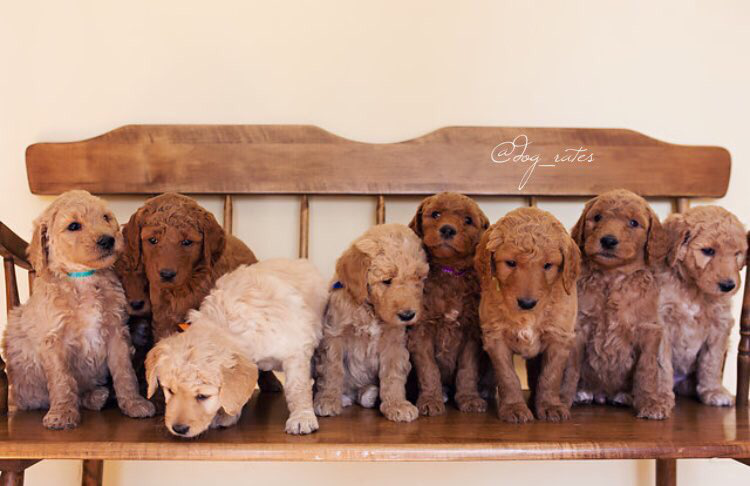

In [99]:
image_url1 = twitter_df_clean.iloc[897,12]
r = requests.get(image_url1)
image = Image.open(BytesIO(r.content))
image.save('pupper1.png')
image

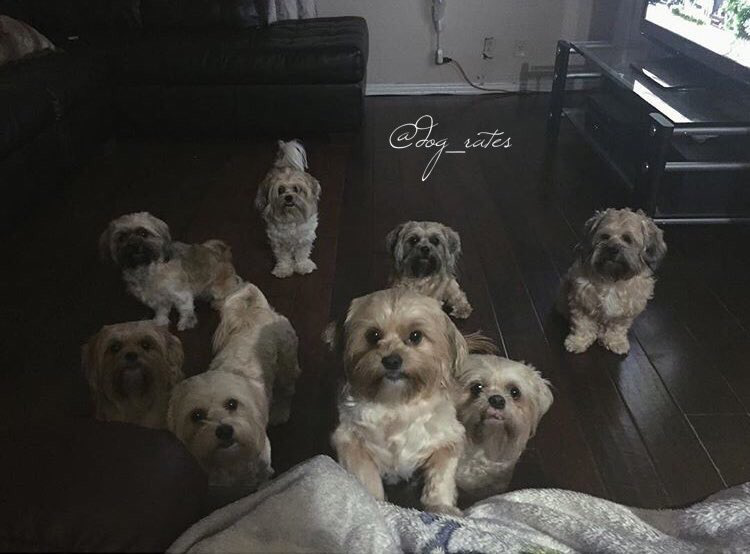

In [100]:
image_url2 = twitter_df_clean.iloc[875,12]
r = requests.get(image_url2)
image = Image.open(BytesIO(r.content))
image.save('pupper2.png')
image

In [101]:
twitter_df_clean.iloc[874,[3,12]]

text       This is Beemo. He's a Chubberflop mix. 12/10 would cross the world for 
jpg_url                            https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg
Name: 874, dtype: object

In [102]:
# correct for the wrongfully extracted numerators & denominators by visually picking the right values (since they aren't so many)
twitter_df_clean.iloc[np.r_[20,593,917,945,1014],5] = [9,10,11,13,14]
twitter_df_clean.iloc[np.r_[20,593,917,945,1014,1353],6] = [10,10,10,10,10,10]


In [103]:
# test
twitter_df_clean.iloc[np.r_[20,593,917,945,1014],[3,5,6]]

,text,rating_numerator,rating_denominator
20,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,9,10
593,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10,10,10
917,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,11,10
945,Happy 4/20 from the squad! 13/10 for all,13,10
1014,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",14,10


In [104]:
# divide denominator ratings assigned to multiple dogs by 10 to get actual no of dogs. 
# divide the corresponding numerator rating by the no of dogs to get the average numerator rating in each case.
# assign the correct numerator and denominator ratings.
for each in twitter_df_clean.itertuples():
    if each.rating_denominator > 10:
        old_val = each.rating_denominator
        dog_no = old_val/10
        new_numerator = each.rating_numerator/dog_no
       
        twitter_df_clean.at[each.Index, 'rating_numerator'] = new_numerator
        twitter_df_clean.at[each.Index, 'rating_denominator'] = 10
        

In [105]:
# test to confirm all incorrect rating_denominator values have been corrected 
twitter_df_clean.query('rating_denominator != 10').loc[:,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator


In [106]:
twitter_df_clean.describe()

,rating_numerator,rating_denominator,favourite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1975.000000,1975.0,1975.000000,1975.000000,1975.000000,1975.000000,1.975000e+03,1.975000e+03
mean,11.703291,10.0,8967.073924,2791.893165,1.202025,0.594974,1.344920e-01,6.012872e-02
std,40.861630,0.0,12281.782993,4704.813775,0.558798,0.272192,1.010703e-01,5.094745e-02
min,0.000000,10.0,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.0,2010.000000,630.000000,1.000000,0.363264,5.299410e-02,1.605405e-02
50%,11.000000,10.0,4163.000000,1371.000000,1.000000,0.587830,1.170030e-01,4.934910e-02
75%,12.000000,10.0,11402.500000,3242.000000,1.000000,0.848438,1.955655e-01,9.153815e-02
max,1776.000000,10.0,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


To understand how the numerator_rating values are assigned, here's a [video](https://twitter.com/dog_rates/status/1461782868875636741?s=20&t=YJ22y7l8uYmcG8wBb10b3g) of the WeRateDogs founder stating that the highest numerator rating ever given is 15 (@ 01: 26). With this in mind, the `twitter_df_clean` is queried to identify numerator ratings higher than 15.

In [107]:
twitter_df_clean.query('rating_numerator > 15').loc[:,['text','rating_numerator']]

,text,rating_numerator
274,After so many requests... here you go.\n\nGood dogg. 420/10,420
555,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26
1071,This is Atticus. He's quite simply America af. 1776/10,1776
1254,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75
1353,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n,24
1873,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27


Numerator ratings for index 274 and 1071 are quite exceptional cases, probably intended for humor. Visual inspection of the image url indicates index 274 is a tweet about Snoop Dog, a famous artist while index 1071 is about a patriotic American dog, the number 1776 being a significant number to America according to the tweet comments.

In order to reduces outliers such as these, impacting on average numerator rating, the index row 274 will be dropped since it does not contain info about an actual dog.

In [108]:
# also visually inspect low numerator ratings (here, low is defined as less than/equal to 5) for any errors
twitter_df_clean.query('rating_numerator <= 5').loc[:,['text','rating_numerator']]

,text,rating_numerator
4,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,5
6,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10,2
17,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10,1
21,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10,3
29,This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10,2
39,Cool dog. Enjoys couch. Low monotone bark. Very nice kicks. Pisses milk (must be rare). Can't go down stairs. 4/10,4
43,This is Josep. He is a Rye Manganese mix. Can drive w eyes closed. Very irresponsible. Menace on the roadways. 5/10,5
45,Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10,2
50,My goodness. Very rare dog here. Large. Tail dangerous. Kinda fat. Only eats leaves. Doesn't come when called 3/10,3
66,These are strange dogs. All have toupees. Long neck for dogs. In a shed of sorts? Work in groups? 4/10 still petable,4


In [109]:
# Again, correct for the wrongfully extracted numerators identified from the 2 tables above; 
# these are numbers extracted without considering preceding values before the decimal point.

twitter_df_clean.iloc[np.r_[555,1254,1633,1873],5] = np.round_([11.26,9.75,13.5,11.27])

In [110]:
# drop index row 274
twitter_df_clean = twitter_df_clean.drop(labels=274, axis=0).reset_index(drop=True)


In [111]:
# impute mean value of the numerator ratings to row index where numerator rating == 24.0
twitter_df_clean.rating_numerator = twitter_df_clean.rating_numerator.replace(24.0, round(twitter_df_clean.rating_numerator.mean()))

In [112]:
#test -should be empty
twitter_df_clean[twitter_df_clean.rating_numerator==24.0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,twitter_url,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [113]:
# dimensions after cleaning
twitter_df_clean.shape

(1974, 23)

#### Test

In [114]:
twitter_df_clean.describe()

,rating_numerator,rating_denominator,favourite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1974.000000,1974.0,1974.000000,1974.000000,1974.000000,1974.000000,1.974000e+03,1.974000e+03
mean,11.445795,10.0,8967.569402,2791.117021,1.202128,0.595227,1.345125e-01,6.012822e-02
std,39.794618,0.0,12284.875319,4705.879452,0.558921,0.272029,1.010918e-01,5.096036e-02
min,0.000000,10.0,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.0,2009.500000,629.500000,1.000000,0.363478,5.298705e-02,1.605313e-02
50%,11.000000,10.0,4156.000000,1370.000000,1.000000,0.588030,1.172000e-01,4.933745e-02
75%,12.000000,10.0,11406.750000,3239.500000,1.000000,0.848476,1.955692e-01,9.155483e-02
max,1776.000000,10.0,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


<a id='store'></a>
## Store Data

Save `twitter_df_clean` to a csv file.


In [115]:
twitter_df_clean.to_csv("twitter_archive_master.csv",index=False)

<a id='analyze'></a>
## Analyzing and Visualizing Data

For this section, three questions are asked to derive valuable insights:
1. Which dog stage has the highest ratings?
3. Which dog stage has the most likes and retweets?
5. What breed of dogs were mostly predicted to be true with the highest confidence?

These questions are answered below and the analyses and visualisations that follow are based on the cleaned data `twitter_df_clean`.

### 1. Dog Stage with the highest ratings

In [116]:
# group `twitter_df_clean` by dog stage and calculate the average rating for each group using numerator values
# sort result in descending order
twitter_df_clean.groupby('dog_stage').rating_numerator.mean().sort_values(ascending=False)

dog_stage
puppo      12.043478
floofer    11.875000
doggo      11.867647
pupper     10.681159
Name: rating_numerator, dtype: float64

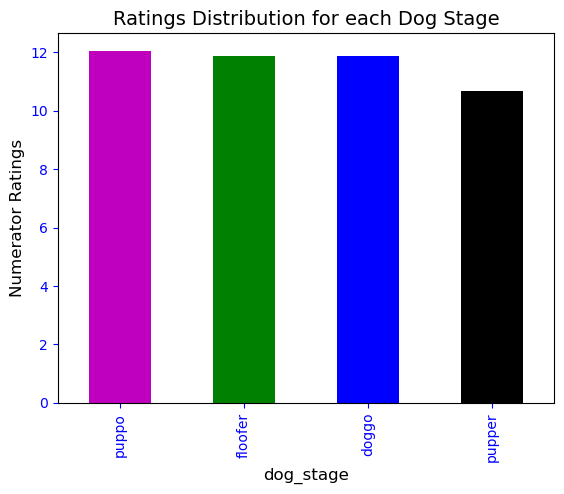

In [117]:
plt.title('Ratings Distribution for each Dog Stage', fontsize=14)
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Numerator Ratings', fontsize=12)
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='blue')
#Plot the data:
my_colors = list('mgbkymc')
twitter_df_clean.groupby('dog_stage').rating_numerator.mean().sort_values(ascending=False).plot(kind= 'bar', color = my_colors)
plt.savefig('rating_distribution')
plt.show;

From the analysis above, puppo is first amongst the dog stages with the highest average ratings with a value of ~12, followed closely by floofer. The dog stage with the least average ratings is pupper with a rating of 10.6.

These average ratings, however are all very close that there might be no significant statistical difference amongst them in terms of ratings.

It could help to see if the ratings awarded by @WeRateDogs are ratings that resonates with the people.To do that, we will look at the dog stage with the most likes as well as retweets below.

### 2. Dog Stage with the Most Likes & Retweets

In [118]:
# group `twitter_df_clean` by dog stage and calculate the average number of likes and retweets per group 
# sort result in descending order
twitter_df_clean.groupby('dog_stage').favourite_count.mean().sort_values(ascending=False)

dog_stage
puppo      22723.913043
doggo      19109.838235
floofer    13701.375000
pupper      7485.657005
Name: favourite_count, dtype: float64

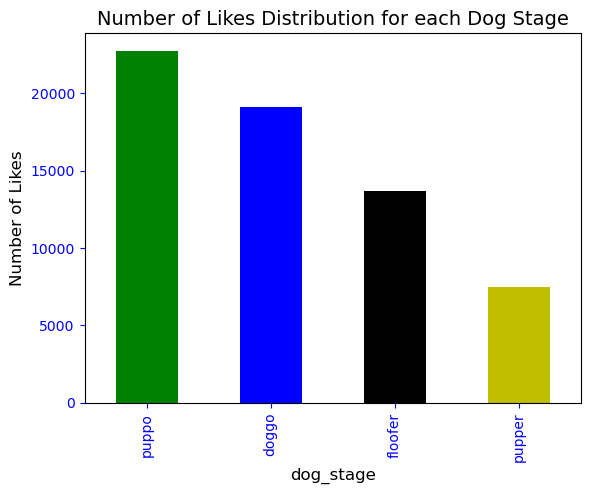

In [119]:
plt.title('Number of Likes Distribution for each Dog Stage', fontsize=14)
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Number of Likes', fontsize=12)
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='blue')
#Plot the data:
my_colors = list('gbkymc')
twitter_df_clean.groupby('dog_stage').favourite_count.mean().sort_values(ascending=False).plot(kind= 'bar', color = my_colors)
plt.savefig('likes_distribution')
plt.show;

In [120]:
twitter_df_clean.groupby('dog_stage').retweet_count.mean().sort_values(ascending=False)

dog_stage
puppo      7027.086957
doggo      7019.397059
floofer    4776.750000
pupper     2464.903382
Name: retweet_count, dtype: float64

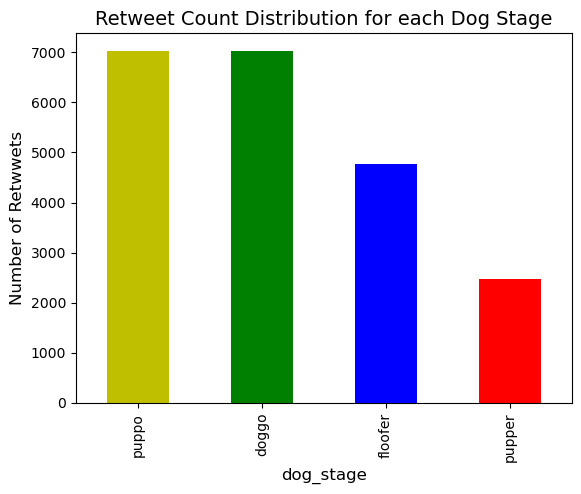

In [121]:
plt.title('Retweet Count Distribution for each Dog Stage', fontsize=14)
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Number of Retwwets', fontsize=12)
#ax = plt.gca()
#ax.tick_params(axis='x', colors='blue')
#ax.tick_params(axis='y', colors='blue')
#Plot the data:
my_colors = list('ygbrkmc')
twitter_df_clean.groupby('dog_stage').retweet_count.mean().sort_values(ascending=False).plot(kind= 'bar', color = my_colors)
plt.savefig('retweets_distribution')
plt.show;

Looking at the figures above, puppo appears to be popular amongst the people with an average of over 22,000 likes and 7000 retweets. However, the doggos displace the floofers as they are the second most retweeted and second most liked category of dog stage. The puppers retain their position as been the least liked and least retweeted about dog stage with almost 2500 retweets and 7485 likes.

In a general sense, it can be said that the ratings distribution almost conforms to the opinions of the @WeRateDogs twitter community.

It is important to note however that these insights might not be accurate and might even contain some level of bias because the data used contained so many missing values in the dog stage that even imputing the mean value of available dog stages would have still been skewed in some form. From the code below, there are 1668 missing values out of 1974 records!

In [122]:
twitter_df_clean.dog_stage.value_counts(dropna=False)

NaN        1668
pupper      207
doggo        68
puppo        23
floofer       8
Name: dog_stage, dtype: int64

### 3. Proportion of Dog Breeds Mostly Predicted Correctly

The results obtained from the neural network algorithm that was used to predict dog breeds from @WeRateDogs twitter archive, stored in `image_predictions_clean` and then merged with the `twitter_df_clean` table, show that the attribute *p1* is its topmost prediction with the highest confidence level.

Therefore, `twitter_df_clean` is queried to only get data for which its predictions were correct i.e *p1_dog* == True. Next, the total count for each breed in *p1* is calculated and the first 10 results are dispalyed as the most popular dog breeds correctly predicted by the neural algorithm.

In [123]:
twitter_df_clean.query('p1_dog == True').p1.value_counts().head(10)

golden_retriever      111
labrador_retriever     75
pembroke               61
chihuahua              55
pug                    38
toy_poodle             32
pomeranian             29
samoyed                29
chow                   29
cocker_spaniel         24
Name: p1, dtype: int64

In [124]:
top_ten = twitter_df_clean.query('p1_dog == True').p1.value_counts().head(10)

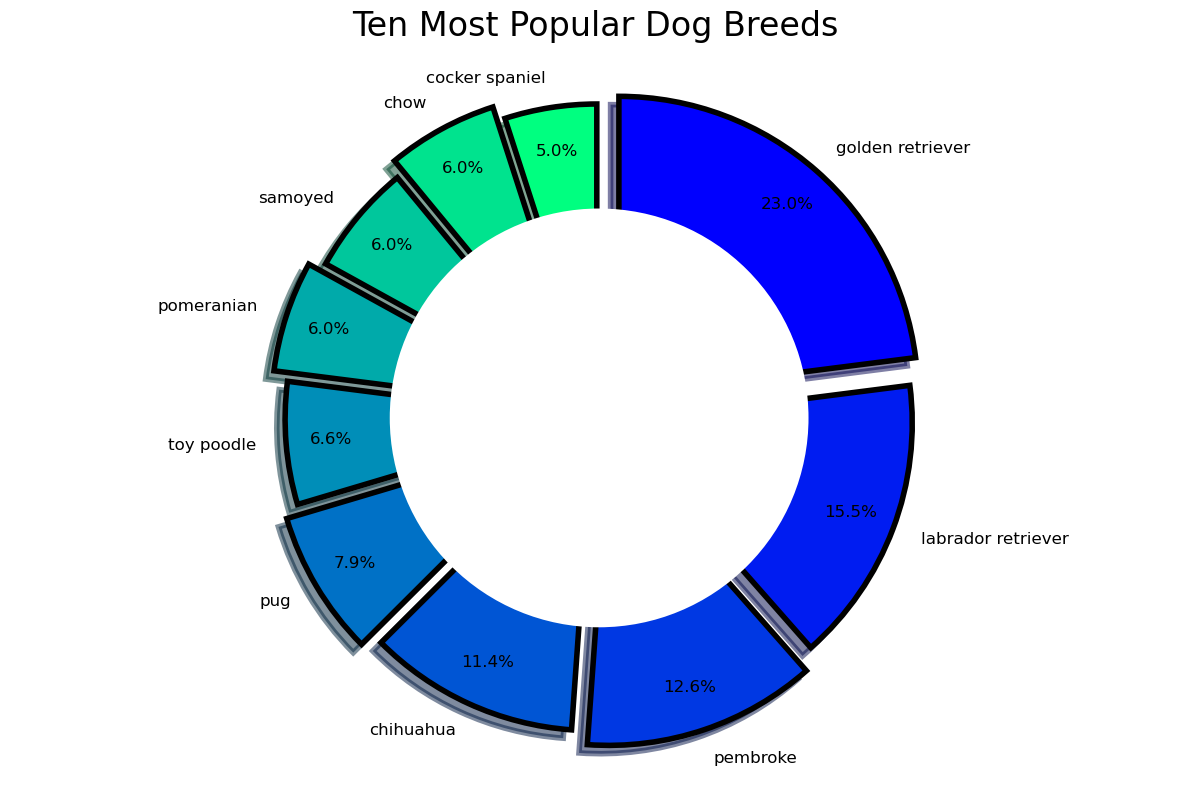

In [125]:
# plot a donut pie chart to visually display in proportions, the top ten dog breeds predicted by the algorithm correctly.
lab = ['golden retriever','labrador retriever','pembroke', 'chihuahua','pug','toy poodle','pomeranian','samoyed','chow', 'cocker spaniel']
color_map = mcp.gen_color(cmap="winter",n=10)
#color_map = mcp.gen_color(cmap="bwr",n=10)
#color_map = plt.get_cmap("Set2")
#my_colors = color_map(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(top_ten,
    labels=lab,
    radius=1,
    explode=[0.1, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1,0.05,0.1,0.05],
    startangle=90,
    colors=color_map,
    counterclock=False,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 4},
    textprops={'fontsize': 12},
    pctdistance=0.85,
    autopct='%1.1f%%')
    #autopct=lambda p:f'{p*sum(top_ten)/100 :.0f} dogs')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.title('Ten Most Popular Dog Breeds', fontsize=24, pad=20)
plt.savefig('top_ten -breeds')
plt.tight_layout()

The data reveals that the golden retriever is the number one dog breed that was correctly predicted by the algorithm used, with 111 dogs, closely followed by the labrador retriever, the pembroke and the chihuahua. On the flip side, the cocker spaniel is the 10th most popular kind with 24 dogs, closely followed by the chow, the samoyed and the pomeranian.